**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

In [2]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes = np.unique(y).reshape(-1, 1, 1)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X, leaf_size=30)

    def predict(self, X):
        which_class = self.predict_proba(X)
        return self.classes[np.argmax(which_class, axis=1)].flatten()

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            dist = cdist(X, self.X_train)
            idx = dist.argsort(axis=1)[:, :self.n_neighbors]
        elif self.algorithm == 'kd_tree':
            idx = self.tree.query(X, k=self.n_neighbors, return_distance=False)
        which_class = self.y_train[idx] == self.classes
        return np.sum(which_class, axis=2).T/self.n_neighbors

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.sum((y_pred == y).astype(int))/len(y)


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [9]:
%time clf.fit(X_train, y_train)


Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [26]:
%time clf.predict(X_test)

Wall time: 0 ns


array([0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1])

In [29]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1])

In [30]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [31]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [32]:
clf.score(X_test, y_test)

0.9333333333333333

In [33]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

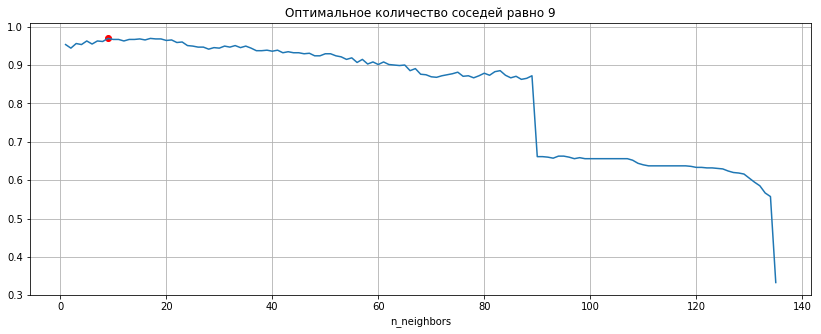

In [35]:
scores = np.zeros(len(X_train))
n_tests = 50

for i in np.arange(n_tests):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    my_clf = MyKNeighborsClassifier(n_neighbors=2)
    my_clf.fit(X_train, y_train)
    for n in np.arange(1, len(X_train) + 1):
        my_clf.n_neighbors = n
        scores[n-1] += my_clf.score(X_test, y_test)

scores /= n_tests
n_optimal = np.argmax(scores)+1

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(111)
plt.plot(np.arange(1, len(X_train)+1), scores)
plt.scatter(n_optimal, scores[n_optimal-1], c='r')
plt.xlabel('score')
plt.xlabel('n_neighbors')
plt.title("Оптимальное количество соседей равно " + str(n_optimal))
plt.grid(True)

**MNIST**

In [36]:
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [38]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [39]:
%time clf.fit(X_train, y_train)

Wall time: 41.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [40]:
%time my_clf.fit(X_train, y_train)

Wall time: 185 ms


In [41]:
%time clf.predict(X_test)

Wall time: 2min 25s


array(['7', '5', '9', '5', '2', '6', '3', '2', '0', '6', '1', '8', '1',
       '2', '8', '7', '6', '4', '7', '0', '0', '0', '6', '6', '9', '5',
       '2', '0', '6', '3', '6', '4', '4', '0', '1', '7', '8', '9', '7',
       '9', '4', '1', '5', '6', '1', '6', '8', '7', '7', '9', '3', '0',
       '9', '8', '1', '2', '5', '3', '3', '6', '8', '0', '6', '7', '1',
       '2', '2', '3', '8', '3', '9', '3', '7', '8', '0', '1', '6', '9',
       '8', '0', '9', '0', '0', '8', '4', '1', '9', '5', '4', '7', '1',
       '6', '7', '4', '5', '6', '2', '3', '3', '9', '6', '0', '3', '0',
       '3', '7', '4', '6', '2', '7', '1', '6', '0', '0', '0', '8', '7',
       '3', '9', '1', '0', '9', '1', '8', '2', '9', '9', '3', '5', '8',
       '9', '9', '2', '1', '3', '2', '6', '2', '3', '7', '3', '5', '7',
       '1', '4', '4', '4', '7', '1', '2', '1', '2', '0', '5', '2', '4',
       '4', '4', '4', '1', '7', '8', '3', '8', '0', '6', '4', '2', '0',
       '8', '0', '8', '9', '4', '3', '2', '4', '1', '7', '0', '1

In [42]:
%time my_clf.predict(X_test)

Wall time: 1min 46s


array(['7', '5', '9', '5', '2', '6', '3', '2', '0', '6', '1', '8', '1',
       '2', '8', '7', '6', '4', '7', '0', '0', '0', '6', '6', '9', '5',
       '2', '0', '6', '3', '6', '4', '4', '0', '1', '7', '8', '9', '7',
       '9', '4', '1', '5', '6', '1', '6', '8', '7', '7', '9', '3', '0',
       '9', '8', '1', '2', '5', '3', '3', '6', '8', '0', '6', '7', '1',
       '2', '2', '3', '8', '3', '9', '3', '7', '8', '0', '1', '6', '9',
       '8', '0', '9', '0', '0', '8', '4', '1', '9', '5', '4', '7', '1',
       '6', '7', '4', '5', '6', '2', '3', '3', '9', '6', '0', '3', '0',
       '3', '7', '4', '6', '2', '7', '1', '6', '0', '0', '0', '8', '7',
       '3', '9', '1', '0', '9', '1', '8', '2', '9', '9', '3', '5', '8',
       '9', '9', '2', '1', '3', '2', '6', '2', '3', '7', '3', '5', '7',
       '1', '4', '4', '4', '7', '1', '2', '1', '2', '0', '5', '2', '4',
       '4', '4', '4', '1', '7', '8', '3', '8', '0', '6', '4', '2', '0',
       '8', '0', '8', '9', '4', '3', '2', '4', '1', '7', '0', '1

In [43]:
%time clf.predict_proba(X_test)

Wall time: 2min 22s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [44]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 44s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [45]:
clf.score(X_test, y_test)

0.9714285714285714

In [46]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 4

In [47]:
clf = KNeighborsClassifier(n_neighbors=n_optimal, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=n_optimal, algorithm='kd_tree')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [49]:
%time clf.fit(X_train, y_train)

Wall time: 43.5 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [50]:
%time my_clf.fit(X_train, y_train)

Wall time: 43.4 s


In [51]:
%time clf.predict(X_test)

Wall time: 2min 28s


array(['7', '4', '2', '1', '2', '9', '6', '9', '7', '9', '6', '9', '1',
       '6', '2', '7', '4', '9', '5', '1', '0', '7', '0', '8', '6', '6',
       '1', '5', '6', '0', '7', '3', '0', '7', '9', '4', '1', '3', '5',
       '0', '5', '9', '3', '7', '7', '1', '6', '4', '1', '6', '7', '0',
       '9', '9', '0', '2', '4', '2', '0', '8', '5', '3', '1', '9', '9',
       '9', '8', '8', '1', '3', '0', '9', '1', '1', '8', '0', '8', '2',
       '5', '1', '6', '3', '6', '7', '1', '7', '0', '2', '7', '2', '6',
       '2', '3', '7', '3', '5', '4', '4', '6', '3', '8', '3', '5', '3',
       '2', '5', '2', '9', '5', '7', '3', '8', '2', '6', '1', '4', '4',
       '4', '5', '2', '2', '3', '2', '5', '0', '9', '7', '5', '8', '7',
       '4', '1', '4', '7', '8', '6', '3', '7', '8', '1', '1', '0', '5',
       '0', '8', '4', '1', '3', '5', '8', '8', '0', '6', '1', '6', '9',
       '9', '7', '7', '9', '2', '0', '1', '6', '7', '1', '2', '9', '5',
       '1', '2', '4', '5', '2', '3', '9', '7', '6', '5', '1', '0

In [52]:
%time my_clf.predict(X_test)

Wall time: 2min 26s


array(['7', '4', '2', '1', '2', '9', '6', '9', '7', '9', '6', '9', '1',
       '6', '2', '7', '4', '9', '5', '1', '0', '7', '0', '8', '6', '6',
       '1', '5', '6', '0', '7', '3', '0', '7', '9', '4', '1', '3', '5',
       '0', '5', '9', '3', '7', '7', '1', '6', '4', '1', '6', '7', '0',
       '9', '9', '0', '2', '4', '2', '0', '8', '5', '3', '1', '9', '9',
       '9', '8', '8', '1', '3', '0', '9', '1', '1', '8', '0', '8', '2',
       '5', '1', '6', '3', '6', '7', '1', '7', '0', '2', '7', '2', '6',
       '2', '3', '7', '3', '5', '4', '4', '6', '3', '8', '3', '5', '3',
       '2', '5', '2', '9', '5', '7', '3', '8', '2', '6', '1', '4', '4',
       '4', '5', '2', '2', '3', '2', '5', '0', '9', '7', '5', '8', '7',
       '4', '1', '4', '7', '8', '6', '3', '7', '8', '1', '1', '0', '5',
       '0', '8', '4', '1', '3', '5', '8', '8', '0', '6', '1', '6', '9',
       '9', '7', '7', '9', '2', '0', '1', '6', '7', '1', '2', '9', '5',
       '1', '2', '4', '5', '2', '3', '9', '7', '6', '5', '1', '0

In [53]:
%time clf.predict_proba(X_test)

Wall time: 2min 28s


array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
%time my_clf.predict_proba(X_test)

Wall time: 2min 28s


array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11111111],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
clf.score(X_test, y_test)

0.9742857142857143

In [56]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 5

In [57]:
# seaborn - библиотека для визуализации данных и статистических моделей (гистограммы,
# диаграммы рассеяния, тепловые карты, "ящики с усами" и т.д.)

# matplotlib - библиотека для визуализации данных, с ее помощью можно строить графики,
# гистограммы, контурные карты, 3D поверхности (изначально - подражание матлабу). На ее основе базируется seaborn.

# train_test_split - разделение выборки на обучающую и тестовую

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Класс Pipeline позволяет склеивать несколько 
# операций обработки данных в единую модель библиотеки scikit-learn. Класс Pipeline предусматривает 
# методы fit, predict и score и имеет все те же свойства, что и любая модель в библиотеке scikit-learn

# StandardScaler (from sklearn.preprocessing import StandardScaler) - StandardScaler нормирует данные, после чего
# среднее становится равным 0, а дисперсия 1

# ClassifierMixin - mixin - класс, реализующий какое-либо чётко выделенное поведение. В данном случа это миксин для
# всех классов-классификаторов. Членом класса является метод score

# NeighborsBase - базовый класс для всех классификаторов на методе ближайших соседей

# KNeighborsMixin - миксин для всех классов-классификаторов, основанных на методе ближайших соседей 

# SupervisedIntegerMixin - миксин для классов-классификаторов, содержит метод fit
